In [7]:
from os import path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mldecompose.molecular_inter import MolecularInteraction
rootfolder = '/home/yizaochen/codes/dna_rna/mldecompose_pnas16mer'

### Part 1: Read DataFrame

In [2]:
ml_arr = MolecularInteraction(rootfolder, 'arna+arna')
df_arr = ml_arr.read_df()
ml_bdd = MolecularInteraction(rootfolder, 'bdna+bdna')
df_bdd = ml_bdd.read_df()

In [4]:
df_arr.head()

,PP,st,PB,R,RB,bp,sum_selected_bonds,sum_of_central_basepairs,sum_of_all_basepairs,enm_lambda,qha_lambda
Mode,,,,,,,,,,,
Mode 1,0.000205,0.000653,0.000143,0.000036,0.000141,0.000207,0.001386,0.000678,0.000697,0.001393,0.001271
Mode 2,0.000303,0.000845,0.000199,0.000046,0.000184,0.000237,0.001814,0.000842,0.000912,0.001825,0.001577
Mode 3,0.000538,0.001842,0.000363,0.000084,0.000324,0.000324,0.003476,0.001213,0.001746,0.003492,0.002592
Mode 4,0.001295,0.001882,0.001146,0.000239,0.000378,0.001175,0.006115,0.002934,0.003134,0.006269,0.003866
Mode 5,0.001613,0.004672,0.001107,0.000295,0.000876,0.000950,0.009513,0.002404,0.004782,0.009564,0.005336


In [6]:
df_bdd.head()

,PP,st,PB,R,RB,bp,sum_selected_bonds,sum_of_central_basepairs,sum_of_all_basepairs,enm_lambda,qha_lambda
Mode,,,,,,,,,,,
Mode 1,0.000110,0.000701,0.000041,0.000005,0.000061,0.000167,0.001084,0.000487,0.000543,0.001087,0.001098
Mode 2,0.000146,0.000809,0.000060,0.000007,0.000063,0.000236,0.001321,0.000592,0.000663,0.001325,0.001394
Mode 3,0.000541,0.001739,0.000153,0.000029,0.000141,0.000525,0.003129,0.001302,0.001570,0.003139,0.002984
Mode 4,0.000646,0.002977,0.000235,0.000027,0.000286,0.000993,0.005164,0.001573,0.002589,0.005178,0.005226
Mode 5,0.002585,0.003171,0.000765,0.000098,0.000517,0.001404,0.008539,0.003224,0.004289,0.008578,0.007883


### Part 2: Process Data for plot

In [6]:
def get_four_inter_contri_sele_mode(df0, mode_id):
    interaction_list = ['base-stacking', 'backbone', 'ribose', 'base-pairing']
    d_result = dict()
    enm_lambda = df0.loc[f'Mode {mode_id}']['enm_lambda']
    for interaction in interaction_list:                                                                       
        lambda_contribution = get_contribution_for_interaction(df0, mode_id, interaction)                     
        d_result[interaction]= (lambda_contribution/enm_lambda) * 100
    return d_result

def get_contribution_for_interaction(df1, mode_id, interaction):
    interaction_map = {'base-stacking': ['st'], 'backbone': ['PP', 'PB'],                                                                       
                       'ribose': ['R', 'RB'], 'base-pairing': ['bp']}   
    lambda_contribution = 0.                                                                                       
    for category in interaction_map[interaction]:                                                                  
        lambda_contribution += df1.loc[f'Mode {mode_id}'][category]                                                
    return lambda_contribution   

In [16]:
sele_na = 'arna+arna' # arna+arna, bdna+bdna
df_sele = d_df[sele_na]
mode_id = 1
d_result_arr = get_four_inter_contri_sele_mode(df_sele, mode_id)
d_result_arr

{'base-stacking': 46.850823040744345,
 'backbone': 25.00602192681986,
 'ribose': 12.725438115060674,
 'base-pairing': 14.886898851936042}

In [17]:
sele_na = 'bdna+bdna' # arna+arna, bdna+bdna
df_sele = d_df[sele_na]
mode_id = 1
d_result_bdd = get_four_inter_contri_sele_mode(df_sele, mode_id)
d_result_bdd

{'base-stacking': 64.4907609390453,
 'backbone': 13.833346422596987,
 'ribose': 6.083981785024173,
 'base-pairing': 15.34960188375746}

/home/yizaochen/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


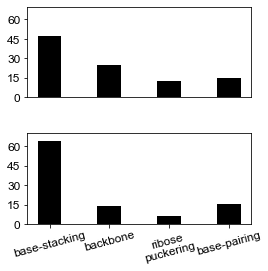

In [40]:
interaction_list = ['base-stacking', 'backbone', 'ribose', 'base-pairing']
interaction_list_v1 = ['base-stacking', 'backbone', 'ribose\npuckering', 'base-pairing']
xlist = range(4)
w = 0.4
ymin = 0
ymax = 70
ytick_lbfz = 12
xtick_lbfz = 12
yticks = [0, 15, 30, 45, 60]

fig = plt.figure(figsize=(4,4))
gs0 = gridspec.GridSpec(2, 1, hspace=0.4)

ax1 = fig.add_subplot(gs0[0,0])
ylist = [d_result_arr[interaction] for interaction in interaction_list]
ax1.bar(xlist, ylist, w, color='black')
ax1.set_xticklabels([])
ax1.tick_params(axis='x', which='both',length=0)
ax1.set_ylim(ymin, ymax)
ax1.set_yticks(yticks)
ax1.tick_params(axis='x', labelsize=xtick_lbfz, pad=-2, labelrotation=30)
ax1.tick_params(axis='y', labelsize=ytick_lbfz)

ax2 = fig.add_subplot(gs0[1,0])
ylist = [d_result_bdd[interaction] for interaction in interaction_list]
ax2.bar(xlist, ylist, w, color='black')
ax2.set_ylim(ymin, ymax)
ax2.set_yticks(yticks)
ax2.set_xticks([0,1,2,3])
ax2.set_xticks(xlist)
ax2.set_xticklabels(interaction_list_v1)
ax2.tick_params(axis='x', labelsize=xtick_lbfz, pad=2, labelrotation=15)
ax2.tick_params(axis='y', labelsize=ytick_lbfz)

plt.tight_layout()
plt.savefig("bend_dsDNA1_dsRNA1.png", dpi=150)
plt.show()

In [43]:
def _get_contribution_for_interaction(df0, mode_id, interaction):
    interaction_map = {'base-stacking': ['st'], 
                       'backbone': ['PP', 'PB'], 
                       'ribose': ['R', 'RB'], 
                       'base-pairing': ['bp']}
    lambda_contribution = 0.
    for category in interaction_map[interaction]:
        lambda_contribution += df0.loc[f'Mode {mode_id}'][category]
    return lambda_contribution

def get_percentage_difference_for_two_modes_four_interactions(df, mode_id_1, mode_id_2):
    interaction_list = ['base-stacking', 'backbone', 'ribose', 'base-pairing']
    enm_lambda_difference = df.loc[f'Mode {mode_id_1}']['enm_lambda'] - df.loc[f'Mode {mode_id_2}']['enm_lambda']
    d_result = dict()
    for interaction in interaction_list:
        differnce = _get_contribution_for_interaction(df, mode_id_1, interaction) - _get_contribution_for_interaction(df, mode_id_2, interaction)
        d_result[interaction] = (differnce/enm_lambda_difference) * 100
    return d_result

In [46]:
# dsDNA
mode_id_1 = 5
mode_id_2 = 3
d_result_bdd = get_percentage_difference_for_two_modes_four_interactions(df_bdd, mode_id_1, mode_id_2)

# dsRNA
mode_id_1 = 4
mode_id_2 = 3
d_result_arr = get_percentage_difference_for_two_modes_four_interactions(df_arr, mode_id_1, mode_id_2)

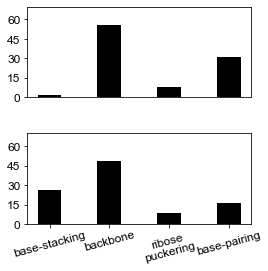

In [48]:
interaction_list = ['base-stacking', 'backbone', 'ribose', 'base-pairing']
interaction_list_v1 = ['base-stacking', 'backbone', 'ribose\npuckering', 'base-pairing']
xlist = range(4)
w = 0.4
ymin = 0
ymax = 70
ytick_lbfz = 12
xtick_lbfz = 12
yticks = [0, 15, 30, 45, 60]

fig = plt.figure(figsize=(4,4))
gs0 = gridspec.GridSpec(2, 1, hspace=0.4)

ax1 = fig.add_subplot(gs0[0,0])
ylist = [d_result_arr[interaction] for interaction in interaction_list]
ax1.bar(xlist, ylist, w, color='black')
ax1.set_xticklabels([])
ax1.tick_params(axis='x', which='both',length=0)
ax1.set_ylim(ymin, ymax)
ax1.set_yticks(yticks)
ax1.tick_params(axis='x', labelsize=xtick_lbfz, pad=-2, labelrotation=30)
ax1.tick_params(axis='y', labelsize=ytick_lbfz)

ax2 = fig.add_subplot(gs0[1,0])
ylist = [d_result_bdd[interaction] for interaction in interaction_list]
ax2.bar(xlist, ylist, w, color='black')
ax2.set_ylim(ymin, ymax)
ax2.set_yticks(yticks)
ax2.set_xticks([0,1,2,3])
ax2.set_xticks(xlist)
ax2.set_xticklabels(interaction_list_v1)
ax2.tick_params(axis='x', labelsize=xtick_lbfz, pad=2, labelrotation=15)
ax2.tick_params(axis='y', labelsize=ytick_lbfz)

#plt.tight_layout()
plt.savefig("st_dsDNA_dsRNA.svg")
plt.show()

### Reload Function

In [19]:
from imp import reload
reload(fig6)

<module 'fig6' from '/home/yizaochen/PycharmProjects/na_paper1_2019/ipynbs/draw_zone/figure6/fig6.py'>